In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [46]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [47]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [19]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y):
    y_pred = X.dot(w)
    return (np.sum((y_pred - y)**2)) / len(y)

Добавил условие останова алгоритма - когда веса перестают изменяться меньше определенного порога 𝜖 .

In [32]:
n = X.shape[0]

eta = 1e-2

# список векторов весов после каждой итерации
w_list = [W.copy()]

# список значений ошибок после каждой итерации
errors = []

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-6

# максимальное число итераций
max_iter = 1e4

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

iter_num = 0  # счетчик итераций

while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X, W)
    dQ = 2 / n * np.dot(X.T, y_pred - y)
    new_W = W - eta * dQ
    weight_dist = np.linalg.norm(new_W - W, ord=2)
    error = mserror(X, new_W, y)
    
    w_list.append(new_W.copy())
    errors.append(error)
    
    if iter_num % 100 == 0:
      print(f'Iteration #{iter_num}:  weights={new_W}, MSE={round(error, 2)}')
    
    iter_num += 1
    W = new_W
    
# w_list = np.array(w_list)
# w_pred = w_list[-1]

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0:  weights=[2.08 4.27], MSE=1777.04
Iteration #100:  weights=[28.38281518  6.83710367], MSE=175.0
Iteration #200:  weights=[38.38986469  5.02247953], MSE=64.94
Iteration #300:  weights=[42.39314129  4.29654705], MSE=47.32
Iteration #400:  weights=[43.99463466  4.00614091], MSE=44.51
Iteration #500:  weights=[44.63530512  3.8899652 ], MSE=44.05
Iteration #600:  weights=[44.89160255  3.84348962], MSE=43.98
Iteration #700:  weights=[44.99413322  3.82489726], MSE=43.97
Iteration #800:  weights=[45.03515017  3.81745947], MSE=43.97
Iteration #900:  weights=[45.05155882  3.81448401], MSE=43.97
Iteration #1000:  weights=[45.05812303  3.8132937 ], MSE=43.97
Iteration #1100:  weights=[45.06074901  3.81281751], MSE=43.97
Iteration #1200:  weights=[45.06179952  3.81262702], MSE=43.97
Iteration #1300:  weights=[45.06221978  3.81255081], MSE=43.97
Iteration #1400:  weights=[45.0623879   3.81252033],

**Сгенерирую датасет**

In [34]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=10000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 20       # Добавим шума в первый признак
display(X, Y, coef)

array([[-5.50323538e+00,  3.88051923e-01],
       [-1.47986374e+01,  6.41540019e-01],
       [ 3.46519912e+01,  1.38746003e+00],
       ...,
       [ 1.99138148e+00,  1.14050425e+00],
       [ 1.14564205e+01, -1.62061166e-03],
       [-1.62195036e+01, -7.90286210e-01]])

array([-14.05893282, -38.97475249,  86.53592019, ...,  10.32003217,
        29.28329989, -35.99295458])

array([47.46102593,  1.66486956])

In [35]:
X.shape

(10000, 2)

In [36]:
Y.shape

(10000,)

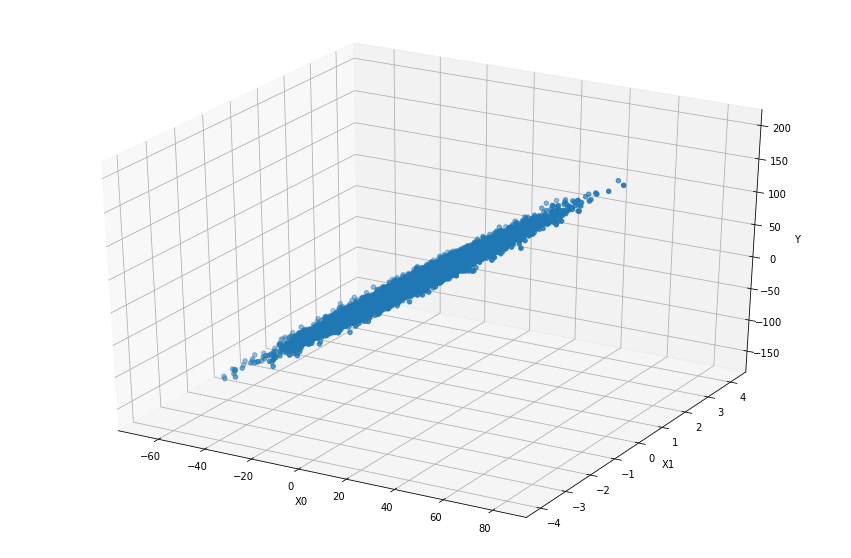

In [37]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

In [38]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [39]:
X_st = X.copy().astype(np.float64)

for i in range(X.shape[1]):
  X_st[:, i] = standard_scale(X_st[:, i])
X_st

array([[-2.77754356e-01,  3.85504659e-01],
       [-7.44773351e-01,  6.35711699e-01],
       [ 1.73972197e+00,  1.37197680e+00],
       ...,
       [ 9.87897050e-02,  1.12821753e+00],
       [ 5.74331592e-01,  8.75901031e-04],
       [-8.16160421e-01, -7.77581502e-01]])

In [40]:
# Классический  градиентный спуск (GD)
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter №{i}: weights {W} error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors

In [41]:
# Стохастический градиентный спуск (SGD)
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-2):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'Amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            inds = np.random.randint(n, size=batch_size)

            X_tmp = X[inds, ]
            y_tmp = np.array(y)[inds]

            
            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
            
            err = calc_mse(y, np.dot(X, W))
        
        if i % (iterations / 10) == 0:
            print(f'Iter №{i}: weights {W}, error {err}')
        errors.append(err)
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors

In [42]:
%%time
W, err_gd = gradient_descent(X_st, Y, iterations=2000, eta=1e-2)

Iter №0: weights [1.09326764 0.33054716] error 2247.306446417901
Iter №200: weights [46.44106909  1.67506936] error 25.860866251131913
Iter №400: weights [47.23850948  1.65625545] error 25.175000945654126
Iter №600: weights [47.25257224  1.65517681] error 25.174786778254393
Iter №800: weights [47.25282093  1.65514464] error 25.17478671063237
Iter №1000: weights [47.25282535  1.65514384] error 25.17478671061079
Iter №1200: weights [47.25282542  1.65514382] error 25.17478671061079
Iter №1400: weights [47.25282543  1.65514382] error 25.17478671061079
Iter №1600: weights [47.25282543  1.65514382] error 25.174786710610785
Iter №1800: weights [47.25282543  1.65514382] error 25.174786710610785
Final MSE: 25.174786710610785
CPU times: user 240 ms, sys: 183 ms, total: 424 ms
Wall time: 231 ms


In [48]:
%%time
W, err_gd = gradient_descent(X, y, iterations=2000, eta=1e-2)

Iter №0: weights [1.92092429 4.18967772] error 3118.410153524573
Iter №200: weights [38.36747399  5.02653974] error 65.47053071283077
Iter №400: weights [43.99105133  4.0067907 ] error 44.51944689385602
Iter №600: weights [44.89102908  3.84359361] error 43.98285427689469
Iter №800: weights [45.03505839  3.81747611] error 43.96911123433588
Iter №1000: weights [45.05810834  3.81329636] error 43.96875925182103
Iter №1200: weights [45.06179717  3.81262745] error 43.968750236954754
Iter №1400: weights [45.06238752  3.8125204 ] error 43.96875000606881
Iter №1600: weights [45.062482    3.81250326] error 43.968750000155424
Iter №1800: weights [45.06249712  3.81250052] error 43.96875000000398
Final MSE: 43.9687500000001
CPU times: user 90.6 ms, sys: 2.28 ms, total: 92.9 ms
Wall time: 97.7 ms


In [49]:
%%time
_, err_sgd = stohastic_gradient_descent(X, y, iterations=2000, batch_size=1800, eta=1e-2)

Amount of batches is 1
Iter №0: weights [1.2219259  4.26572077], error 1850.23988945261
Iter №200: weights [38.23207164  5.06900416], error 65.96837765899889
Iter №400: weights [43.97157705  3.98427575], error 44.53611567737515
Iter №600: weights [44.88590509  3.83736439], error 43.984100256188434
Iter №800: weights [45.02828933  3.81442253], error 43.96958857768878
Iter №1000: weights [45.06949998  3.82630385], error 43.97261804544948
Iter №1200: weights [45.09756538  3.82511745], error 43.97534059613167
Iter №1400: weights [45.08434851  3.81670996], error 43.97008054998805
Iter №1600: weights [45.06778085  3.81357352], error 43.968831493268716
Iter №1800: weights [45.04788983  3.80450831], error 43.970749758408964
Final MSE: 43.97085695157212
CPU times: user 319 ms, sys: 1.27 ms, total: 320 ms
Wall time: 330 ms


In [43]:
%%time
_, err_sgd = stohastic_gradient_descent(X_st, Y, iterations=2000, batch_size=1800, eta=1e-2)

Amount of batches is 6
Iter №0: weights [ 5.73965318 -0.20097034], error 1753.974118108517
Iter №200: weights [47.25504171  1.66862779], error 25.17497421987726
Iter №400: weights [47.25398858  1.65797311], error 25.174796154327684
Iter №600: weights [47.24520028  1.64853537], error 25.174889840003004
Iter №800: weights [47.22654519  1.65974032], error 25.17549533716077
Iter №1000: weights [47.26221425  1.6309832 ], error 25.175452676634045
Iter №1200: weights [47.26870927  1.63980323], error 25.175267982591247
Iter №1400: weights [47.22888347  1.65452521], error 25.175360697075114
Iter №1600: weights [47.2289014   1.67062218], error 25.17558898617753
Iter №1800: weights [47.2573121   1.65877446], error 25.174820447497954
Final MSE: 25.174813044469914
CPU times: user 3.49 s, sys: 3.1 s, total: 6.59 s
Wall time: 4.54 s


Text(0, 0.5, 'MSE')

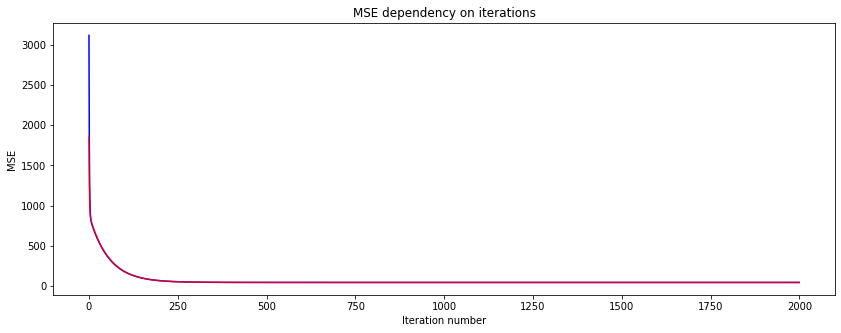

In [50]:
# Визуализируем изменение функционала ошибки для каждого метода
plt.figure(figsize=(14, 5))
plt.plot(range(len(err_gd)), err_gd, color='b') #, alpha=0.8)
plt.plot(range(len(err_sgd)), err_sgd, color='r', alpha=0.8)
plt.title('MSE dependency on iterations')
plt.xlabel('Iteration number')
plt.ylabel('MSE')